# Model-related figures for EGU25

List of figures:
1) Profiles at start and end, overlayed with mooring data, incl. N2 to emphasize *shallow* plumes
2) Hovmollers aliased at mooring locations and times
3) Heat at surface 
4) Something for the website, maybe gifs/videos/stills/ etc.


In [1]:
#== Imports ==#
import xarray as xr 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import axisartist
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.lines as mlines
import pastamarkers
import matplotlib as mpl
import basic_model_anayses as bma
from datetime import datetime, timedelta
import gsw
import xmitgcm
from matplotlib.colors import TwoSlopeNorm
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

import sys
sys.path.insert(1, '../obs_analyses/')
import mooring_analyses
import woa_analyses

In [94]:
#== Open mooring and model data ==#
#ds_model = bma.open_mitgcm_output_all_vars('../../../work/projects/p_so-clim/GCM_data/RowanMITgcm/mrb_051')
ds_model = bma.open_mitgcm_output_all_vars('../MITgcm/so_plumes/mrb_052')
ds_model = bma.calculate_sigma0_TEOS10(ds_model) # Adding density as a variable

ds_mooring = mooring_analyses.open_mooring_ml_data(time_delta='hour')
ds_mooring = mooring_analyses.correct_mooring_salinities(ds_mooring)

You need to test if you can use gsw in this way, feeding it ds and da etc


/albedo/home/robrow001/model_analyses/../obs_analyses/mooring_analyses.py:84: RuntimeWarning: invalid value encountered in scalar divide
  new_df['var'] = df.resample('h').apply(lambda df : np.sum(df['weights']*df['var'])/np.sum(df['weights']))
/albedo/home/robrow001/model_analyses/../obs_analyses/mooring_analyses.py:84: RuntimeWarning: invalid value encountered in scalar divide
  new_df['var'] = df.resample('h').apply(lambda df : np.sum(df['weights']*df['var'])/np.sum(df['weights']))
/albedo/home/robrow001/model_analyses/../obs_analyses/mooring_analyses.py:84: RuntimeWarning: invalid value encountered in scalar divide
  new_df['var'] = df.resample('h').apply(lambda df : np.sum(df['weights']*df['var'])/np.sum(df['weights']))


Mooring data opened
 50 m 12-month mean from mooring: 34.369026301369864
 50 m 12-month mean from WOA:     34.38139177087235
Difference: -0.012365469502483961

125 m 12-month mean from mooring: 34.62639991010118
125 m 12-month mean from WOA:     34.59236408390411
Difference: 0.03403582619706924

220 m 12-month mean from mooring: 34.65630465643637
220 m 12-month mean from WOA:     34.69025839191593
Difference: -0.03395373547956382
Salinities corrected


## Profiles

In [95]:
ds1_model = ds_model.sel(time=np.timedelta64(int(0),'h'))
ds2_model = ds_model.sel(time=np.timedelta64(int(72),'h'))
ds1_mooring = ds_mooring.sel(day=slice('2021-09-12T21:00:00.000000000','2021-09-13T03:00:00.000000000')).mean(dim='day',skipna=True)
ds2_mooring = ds_mooring.sel(day=slice('2021-09-15T21:00:00.000000000','2021-09-16T03:00:00.000000000')).mean(dim='day',skipna=True)

/tmp/ipykernel_235921/70405905.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[0].scatter(x=gsw.pt0_from_t(ds1_mooring['SA'],ds1_mooring['T'],ds1_mooring['p_from_z']).values,
/tmp/ipykernel_235921/70405905.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs0b.scatter(x=ds1_mooring['SA'].values,
/tmp/ipykernel_235921/70405905.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, whic

<Figure size 640x480 with 0 Axes>

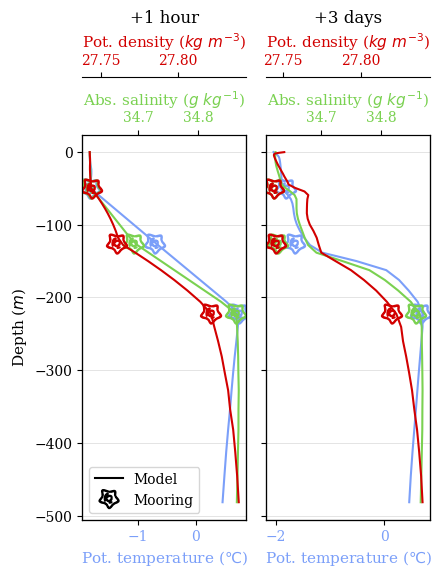

In [99]:
import pastamarkers.markers


plt.clf()
plt.rcParams["font.family"] = "serif" # change the base font
fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(4.5,6),sharey=True)

#== Colours and lines ==#
cs = {'s': mpl.colormaps['viridis'](0.8), 't': mpl.colormaps['coolwarm'](0.2), 'pot_theta': mpl.colormaps['hot_r'](0.7)}
marker = pastamarkers.markers.stelline  

#== Panel 1 ==#

# Potential temperature
colour = cs['t']
axs[0].plot( ds1_model['T'].isel(YC=75,XC=75).values , ds1_model['Z'].values, c=colour ) 
axs[0].scatter(x=gsw.pt0_from_t(ds1_mooring['SA'],ds1_mooring['T'],ds1_mooring['p_from_z']).values,
               y=(-1)*ds1_mooring['p_from_z'].values,
               marker=marker,
               c=colour,s=250)
axs[0].set_xlabel('Pot. temperature ($℃$)', fontsize=11, c=colour)
axs[0].tick_params(axis='x', labelcolor=colour)
axs[0].set_ylabel('', fontsize=11)
axs[0].set_title('', fontsize=12)

# Absolute salinity
colour = cs['s']
axs0b = axs[0].twiny()
axs0b.plot( ds1_model['S'].isel(YC=75,XC=75).values, ds1_model['Z'].values,c=colour)
axs0b.scatter(x=ds1_mooring['SA'].values,
              y=(-1)*ds1_mooring['p_from_z'].values,
              marker=marker,
              c=colour,s=250)
axs0b.tick_params(axis='x', labelcolor=colour)
axs0b.set_xlabel('Abs. salinity ($g$ $kg^{-1}$)', fontsize=11, c=colour)
axs0b.set_ylabel('', fontsize=11)
axs0b.set_title('', fontsize=12)

# Potential density
colour = cs['pot_theta']
axs0c = axs[0].twiny()
axs0c.plot( ds1_model['rho_theta'].isel(YC=75,XC=75).values, ds1_model['Z'].values, c=colour)
axs0c.scatter(x=ds1_mooring['pot_rho'].values,
              y=(-1)*ds1_mooring['p_from_z'].values,
              marker=marker,
              c=colour,s=250)
axs0c.set_xlabel('Pot. density ($kg$ $m^{-3}$)', fontsize=11, c=colour)
axs0c.spines.top.set_position(("axes", 1.15))
axs0c.tick_params(axis='x', labelcolor=colour)
axs0c.set_ylabel('', fontsize=11)
axs0c.set_title('', fontsize=12)

#== Panel 2 ==#

# Potential temperature
colour = cs['t']
axs[1].plot( ds2_model['T'].isel(YC=75,XC=75).values, ds2_model['Z'].values, c=colour)
axs[1].scatter(x=gsw.pt0_from_t(ds2_mooring['SA'],ds2_mooring['T'],ds2_mooring['p_from_z']).values,
               y=(-1)*ds2_mooring['p_from_z'].values,
               marker=marker,
               c=colour,s=250)
axs[1].set_xlabel('Pot. temperature ($℃$)', fontsize=11, c=colour)
axs[1].tick_params(axis='x', labelcolor=colour)
axs[1].set_ylabel('', fontsize=11)
axs[1].set_title('', fontsize=12)

# Absolute salinity
colour = cs['s']
axs1b = axs[1].twiny()
axs1b.plot( ds2_model['S'].isel(YC=75,XC=75).values, ds2_model['Z'].values,c=colour)
axs1b.scatter(x=ds2_mooring['SA'].values,
              y=(-1)*ds2_mooring['p_from_z'].values,
              marker=marker,
              c=colour,s=250)
axs1b.set_xlabel('Abs. salinity ($g$ $kg^{-1}$)', fontsize=11, c=colour)
axs1b.tick_params(axis='x', labelcolor=colour)
axs1b.set_ylabel('', fontsize=11)
axs1b.set_title('', fontsize=12)

# Potential density
colour = cs['pot_theta']
axs1c = axs[1].twiny()
axs1c.plot( ds2_model['rho_theta'].isel(YC=70,XC=75).values, ds2_model['Z'].values,c=colour)
axs1c.scatter(x=ds2_mooring['pot_rho'].values,
                   y=(-1)*ds2_mooring['p_from_z'].values,
                   marker=marker,
                   c=colour,s=250)
axs1c.set_xlabel('Pot. density ($kg$ $m^{-3}$)', fontsize=11, c=colour)
axs1c.spines.top.set_position(("axes", 1.15))
axs1c.tick_params(axis='x', labelcolor=colour)
axs1c.set_ylabel('', fontsize=11)
axs1c.set_title('', fontsize=12)

#== Subplot titles, misc ==#
axs[0].set_title('+1 hour', fontsize=12)
axs[0].set_ylabel('Depth ($m$)', fontsize=11)
axs[1].set_title('+3 days', fontsize=12)
axs[1].set_ylabel('', fontsize=11)
axs[0].grid(True,c='black',lw=0.5,alpha=0.15,axis='y') #xaxis.
axs[1].grid(True,c='black',lw=0.5,alpha=0.15,axis='y') #xaxis.

#== Legend (from Copilot!) ==#
black_line = mlines.Line2D([], [], color='black', label='Model')
custom_marker = mlines.Line2D([], [], color='black', marker=marker,
                               linestyle='None', markersize=15, label='Mooring')
axs[0].legend(handles=[black_line, custom_marker], loc='lower left', fontsize=10, ncol=1)

plt.tight_layout()

plt.savefig('figures/EGU25_figs/EGU25_profiles.png',dpi=1200,bbox_inches='tight')


## Hovmollers

Based on the code from mooring_analyses.plt_hovm_EGU

Consider using in-situ temp, so that it's comparable to the mooring hovmollers

In [182]:
#== Open model data ==#
ds_model = bma.open_mitgcm_output_all_vars('../MITgcm/so_plumes/mrb_052')
ds_model = bma.calculate_sigma0_TEOS10(ds_model) # Adding density as a variable
ds_model = bma.calculate_pressure(ds_model, g=9.81) # Adding pressure as a variable (as Pa, div. by 10000 for dbar)
ds_model['time'] = [datetime(2021,9,13,0) + timedelta(seconds=t.data.astype('timedelta64[s]').item().total_seconds()) for t in ds_model['time']] # For plotting later

You need to test if you can use gsw in this way, feeding it ds and da etc
UPDATE THIS TO USE RHOREF AND MAYBE PREF WITH TEOS


In [201]:
#== Calculate what we're going to plot ==#
ts = slice(datetime(2021,9,13,1), datetime(2021,9,16,0))
dss = ds_model['S'].isel(Z=slice(0,-8),YC=70,XC=75).sel(time=ts)#.isel(time=slice(None,None,4))
dspt = ds_model['T'].isel(Z=slice(0,-8),YC=70,XC=75).sel(time=ts)#.isel(time=slice(None,None,4))
dsp = ds_model['p'].isel(Z=slice(0,-8),YC=70,XC=75).sel(time=ts)/10000#.isel(time=slice(None,None,4))
dsist = gsw.t_from_CT(dss, gsw.CT_from_pt(dss,dspt), dsp)
dsr = ds_model['rho_theta'].isel(Z=slice(0,-8),YC=70,XC=75).sel(time=ts)#.isel(time=slice(None,None,4))

<Figure size 640x480 with 0 Axes>

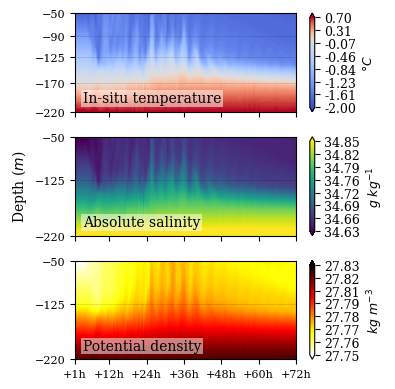

In [ ]:
plt.clf()
plt.rcParams["font.family"] = "serif" # change the base font
f, axs = plt.subplots(nrows=3,ncols=1,figsize=(4, 4),sharex=True)

#== In-situ temperature ==#
lower_lim, upper_lim = -2, 0.7
norm_t = TwoSlopeNorm(0,lower_lim, upper_lim)
t = dsist.plot.contourf('time','Z',ax=axs[0],levels=150,norm=norm_t,add_colorbar=False,cmap=plt.colormaps['coolwarm']) #
cbar = plt.colorbar(t, orientation="vertical",format=ticker.FormatStrFormatter('%.2f'))#, label='Temperature ($\degree C$)')
cbar.set_label('$\degree C$', rotation=90, fontsize=9)
cbar.ax.tick_params(labelsize=9)
cbar.locator = ticker.LinearLocator(8)
axs[0].set_ylabel('')
axs[0].set_title('')
axs[0].set_yticks([-50,-90,-125,-170,-220])
axs[0].set_xlabel('',fontsize=11)
axs[0].tick_params(labelsize=8)
axs[0].set_ylim(-220,-50)

#== Absolute salinity ==#
lower_lim, upper_lim = 34.63, 34.85
norm_s = plt.Normalize(lower_lim, upper_lim)
s = dss.plot.contourf('time','Z',ax=axs[1],levels=150,norm=norm_s,add_colorbar=False,cmap=plt.colormaps['viridis']) #.isel(Z=[21,32,39])
cbar = plt.colorbar(s, orientation="vertical",format=ticker.FormatStrFormatter('%.2f'))#, label='Temperature ($\degree C$)')
cbar.set_label('$g$ $kg^{-1}$', rotation=90, fontsize=9)
cbar.ax.tick_params(labelsize=9)
cbar.locator = ticker.LinearLocator(8)
axs[1].set_ylabel('Depth ($m$)')
axs[1].set_title('')
axs[1].set_yticks([-50,-125,-220])
axs[1].set_xlabel('',fontsize=11)
axs[1].tick_params(labelsize=8)
axs[1].set_ylim(-220,-50)

#== Potential density ==#
lower_lim, upper_lim = 27.745, 27.83
norm_r = plt.Normalize(lower_lim, upper_lim)
r = dsr.plot.contourf('time','Z',ax=axs[2],levels=150,norm=norm_r,add_colorbar=False,cmap=plt.colormaps['hot_r']) #.isel(Z=[21,32,39])
cbar = plt.colorbar(r, orientation="vertical",format=ticker.FormatStrFormatter('%.2f'))#, label='Temperature ($\degree C$)')
cbar.set_label('$kg$ $m^{-3}$', rotation=90, fontsize=9)
cbar.ax.tick_params(labelsize=9)
cbar.locator = ticker.LinearLocator(8)
axs[2].set_ylabel('')
axs[2].set_title('')
axs[2].set_yticks([-50,-125,-220])
axs[2].set_xlabel('',fontsize=11)
axs[2].tick_params(labelsize=8)
axs[2].set_ylim(-220,-50)

#== Gridlines ==#
axs[0].grid(True,c='black',lw=0.5,alpha=0.15,axis='y') #xaxis.
axs[1].grid(True,c='black',lw=0.5,alpha=0.15,axis='y') #xaxis.
axs[2].grid(True,c='black',lw=0.5,alpha=0.15,axis='y') #xaxis.

#== Annotations ==#
ta = axs[0].text(0.035,0.095,'In-situ temperature',transform=axs[0].transAxes,fontsize=10)
ta.set_bbox(dict(facecolor='white', alpha=0.5,lw =0, boxstyle='square,pad=0.1'))
sa = axs[1].text(0.035,0.095,'Absolute salinity',transform=axs[1].transAxes,fontsize=10)
sa.set_bbox(dict(facecolor='white', alpha=0.5,lw =0, boxstyle='square,pad=0.1'))
sa = axs[2].text(0.035,0.095,'Potential density',transform=axs[2].transAxes,fontsize=10)
sa.set_bbox(dict(facecolor='white', alpha=0.5,lw =0, boxstyle='square,pad=0.1'))

#== Dealing with x ticks ==#
ticks = [datetime(2021,9,13,1),datetime(2021,9,13,12),datetime(2021,9,14,0),
        datetime(2021,9,14,12),datetime(2021,9,15,0),datetime(2021,9,15,12),
        datetime(2021,9,16,0)]
axs[2].set_xticks(ticks)
tick_labels = [ tick - datetime(2021,9,13,0) for tick in ticks]
tick_labels = [ '+'+str(int(t.total_seconds()/3600))+'h' for t in tick_labels]
axs[2].xaxis.set_ticklabels(tick_labels)

plt.tight_layout()
plt.savefig('figures/EGU25_figs/EGU25_model_hovmollers.png',dpi=1200,bbox_inches='tight')

# Heat flux?

I'll look at heat transport due to advection (don't know how to handle diffusion) through the 50 m layer (because that's where the upper sensor is) 

Heat content is given by 
$$
    HC = \int \rho\ c_p\ T\ dV,
$$
where in this case $c_p$ is 4,000 $J\ kg^{-1}\ ℃^{-1}$ (value used in the `data` file), $\rho$ is the potential density in $kg\ m^{-3}$, and $T$ is potential temperature in $℃$. Here, the idea is to calculate the $HC$ in each cell and then look at the vertical advective flux over 72 hours. Units through a horizontal plane is probably something like $J\ m^{-2}\ s^{-1}$ (otherwise known as $W\ m^{-2}$). If we look at vertical velocities (units: $m\ s^{-1}$) multiplied by $HC$ (units: $J\ m^{-3}$) then we've got vertical heat flux.

In [2]:
#== Open model data ==#
ds_model = bma.open_mitgcm_output_all_vars('../MITgcm/so_plumes/mrb_052')
ds_model = bma.calculate_sigma0_TEOS10(ds_model) # Adding potential density as a variable
ds_model = bma.calculate_pressure(ds_model, g=9.81) # Adding pressure as a variable (as Pa, div. by 10000 for dbar)
ds_model['time'] = [datetime(2021,9,13,0) + timedelta(seconds=t.data.astype('timedelta64[s]').item().total_seconds()) for t in ds_model['time']] # For ease of plotting later

You need to test if you can use gsw in this way, feeding it ds and da etc
UPDATE THIS TO USE RHOREF AND MAYBE PREF WITH TEOS


In [3]:
#== Heat content function==#
def HC(ds):
    cp = 4000 # This is the value used in the model, so it's what we'll use here
    return (ds['rho_theta']*cp*(ds['T']+2.05)) # Unit: J/m**3; we aren't integrating over volume here, and we're also using a reference temp equal to the threshold set using Tfreezing

In [4]:
#== Pre-calculations ==#
ds = ds_model
ds['hc'] = HC(ds_model)
ds['Z'] = [float(i) for i in ds_model['Z'].data] # Handling big-endian-ness, because interp won't work otherwise
ds['Zl'] = [float(i) for i in ds_model['Zl'].data] # Handling big-endian-ness, because interp won't work otherwise
dshc = ds['hc'].interp(Z=[-50]).isel(Z=0) # We want the J per m**3 at exactly 50 m depth
dsw = ds['W'].interp(Zl=[-50]).isel(Zl=0) # And we want the vertical velocities at exactly 50 m depth

In [5]:
#== Calculating HF ==#
dshf = dshc*dsw # HF = HC*W
dshf = xr.where(ds['W'].isel(time=3,Zl=0)>-1e-8, dshf, 0) # Mask out the centre plume/forced area

<Figure size 640x480 with 0 Axes>

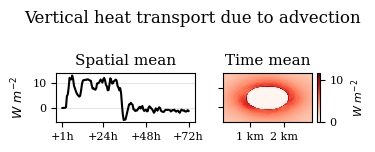

In [6]:
#== Plotting ==#
plt.clf()
plt.rcParams["font.family"] = "serif" # change the base font
f, axs = plt.subplots(nrows=1,ncols=2,figsize=(4, 1.5),width_ratios=[2.5, 2])
plt.suptitle('Vertical heat transport due to advection',fontsize=12)
dshf.sel(time=slice(datetime(2021,9,13,1), datetime(2021,9,16,0))).isel(XC=slice(10,140),YC=slice(10,140)).mean(dim=['XC','YC']).plot(ax=axs[0],c='k') # Take the mean in space and plot over time
axs[0].tick_params(labelsize=8)
axs[0].set_title("Spatial mean",fontsize=11)
axs[0].set_ylabel("$W$ $m^{-2}$",fontsize=9)
axs[0].set_xlabel('')
axs[0].grid(True,c='black',lw=0.5,alpha=0.15,axis='y') 

#== Plotting map ==#
p = dshf.sel(time=slice(datetime(2021,9,13,1), datetime(2021,9,16,0))).isel(XC=slice(10,140),YC=slice(10,140)).mean(dim='time').plot(ax=axs[1],cmap='Reds', add_colorbar=False) # Take the mean in time and plot a "map"
cbar = plt.colorbar(p, orientation="vertical")#,format=ticker.FormatStrFormatter('%.2f'))#, label='Temperature ($\degree C$)')
cbar.set_label('$W$ $m^{-2}$', rotation=90, fontsize=8)
cbar.ax.tick_params(labelsize=8)
#cbar.locator = ticker.LinearLocator(2)
axs[1].set_title("Time mean",fontsize=11)
axs[1].tick_params(labelsize=8)
axs[1].set_ylabel("",fontsize=11)
axs[1].set_xlabel("",fontsize=11)

#== Dealing with x ticks ==#
ticks = [datetime(2021,9,13,1),datetime(2021,9,14,0),datetime(2021,9,15,0),datetime(2021,9,16,0)]
axs[0].set_xticks(ticks)
tick_labels = [ tick - datetime(2021,9,13,0) for tick in ticks]
tick_labels = [ '+'+str(int(t.total_seconds()/3600))+'h' for t in tick_labels]
axs[0].xaxis.set_ticklabels(tick_labels)

ticks = [1000,2000]
axs[1].set_xticks(ticks)
axs[1].set_yticks(ticks)
tick_labels = [ str(int(tick/1000))+' km' for tick in ticks]
axs[1].xaxis.set_ticklabels(tick_labels)
axs[1].yaxis.set_ticklabels(['',''])

plt.tight_layout()
plt.savefig('figures/EGU25_figs/EGU25_hf.png',dpi=1200,bbox_inches='tight')